In [1]:
#Importing Libraries
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('1651277648862_healthinsurance.csv')
data['city'].value_counts()


city
NewOrleans    302
Nashville     302
Charleston    298
Brimingham    298
Memphis       297
             ... 
Warwick        69
Trenton        69
York           69
Baltimore      69
Syracuse       69
Name: count, Length: 91, dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(6), object(4)
memory usage: 1.5+ MB


In [4]:
data.isna().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
dtype: int64

In [5]:
columns = ['hereditary_diseases', 'job_title', 'city', 'sex']
 
label_encoders = {}
for col in columns:
    label_encoders[col] = preprocessing.LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])
 
data.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7


In [6]:
data.skew()

age                    0.005577
sex                    0.040546
weight                 0.286034
bmi                    0.375259
hereditary_diseases   -4.724370
no_of_dependents       0.928935
smoker                 1.514812
city                  -0.063712
bloodpressure         -1.963879
diabetes              -1.331037
regular_ex             1.323201
job_title             -0.198130
claim                  1.497829
dtype: float64

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/4156840497.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

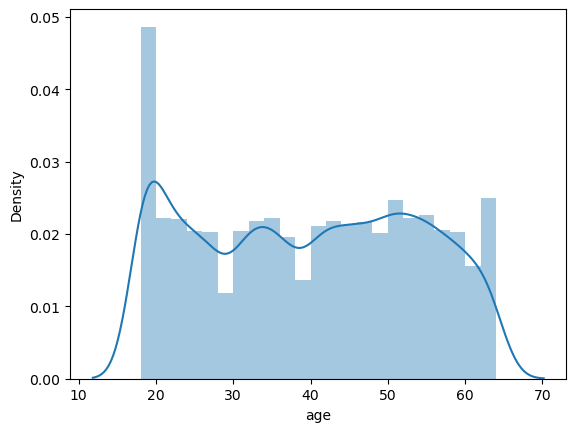

In [7]:
sns.distplot(data.age)

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/582978698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.bmi)


<Axes: xlabel='bmi', ylabel='Density'>

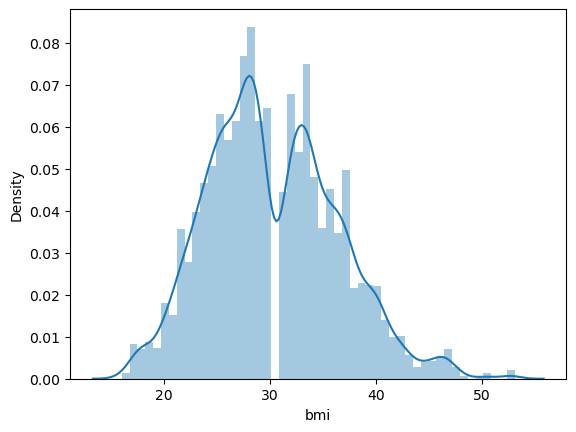

In [8]:
sns.distplot(data.bmi)

In [9]:
temp_data=data
temp_data['age']=temp_data['age'].fillna(temp_data['age'].mean())

temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


In [10]:
temp_data=data
temp_data['bmi']=temp_data['bmi'].fillna(temp_data['bmi'].mean())

temp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  15000 non-null  float64
 1   sex                  15000 non-null  int64  
 2   weight               15000 non-null  int64  
 3   bmi                  15000 non-null  float64
 4   hereditary_diseases  15000 non-null  int64  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int64  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int64  
 12  claim                15000 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 1.5 MB


/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/3943357911.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

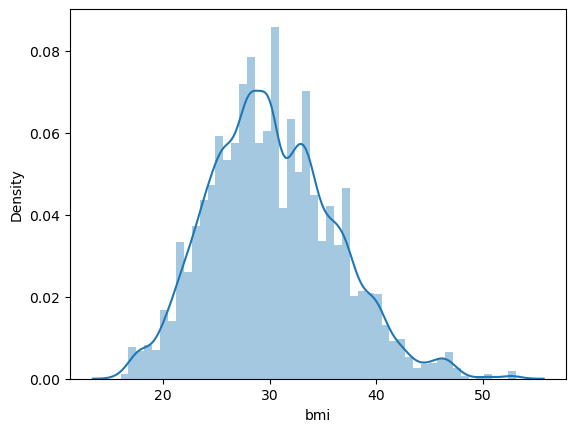

In [11]:
sns.distplot(temp_data['bmi'])

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/2952498666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_data.age)


<Axes: xlabel='age', ylabel='Density'>

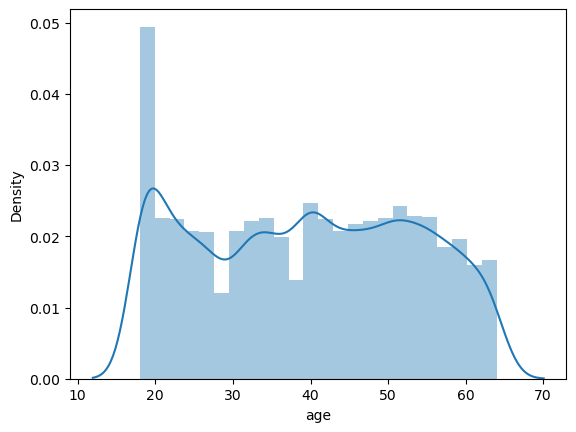

In [12]:
sns.distplot(temp_data.age)

In [13]:
data.duplicated().sum()

1096

In [14]:
data[data.duplicated()]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim
605,46.0,0,68,30.266413,8,2,0,41,60,1,0,12,8825.1
608,27.0,0,82,30.266413,8,3,0,57,82,1,1,4,18804.8
898,48.0,0,67,33.100000,0,0,1,15,70,1,0,24,40974.2
919,26.0,1,56,23.700000,8,2,0,36,72,1,0,22,3484.3
970,48.0,0,70,28.900000,8,1,0,35,72,0,0,4,9249.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,46.0,1,46,22.300000,8,0,0,42,72,1,0,0,7147.1
14971,18.0,0,53,27.300000,8,3,1,5,85,1,0,33,18223.5
14987,47.0,1,94,47.500000,8,1,0,68,61,1,0,0,8083.9
14989,44.0,1,90,38.100000,8,1,0,26,76,1,0,16,7152.7


In [15]:
temp_data = temp_data.drop_duplicates()
temp_data.duplicated().sum()

0

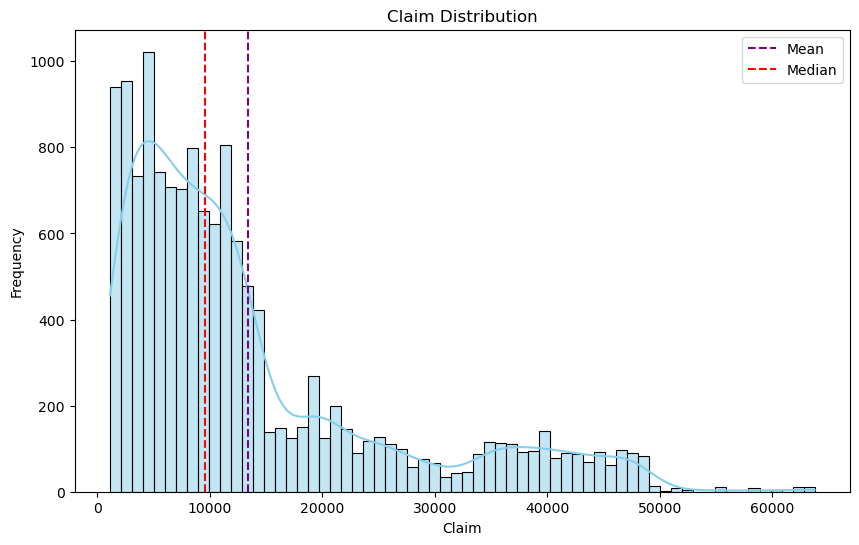

Skewness: 1.49
Mean: 13431.81
Median: 9567.00


In [16]:
# Setting up the figure size
plt.figure(figsize=(10, 6))
 
# Creating a histogram plot for the 'claim' column
sns.histplot(temp_data['claim'], kde=True, color='skyblue')
 
# Adding vertical lines to represent the mean and median
plt.axvline(temp_data['claim'].mean(), color='purple', linestyle='dashed', linewidth=1.5, label='Mean')
plt.axvline(temp_data['claim'].median(), color='red', linestyle='dashed', linewidth=1.5, label='Median')
 
# Adding labels and title
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.title('Claim Distribution')
 
# Adding a legend to explain the lines
plt.legend()
 
# Showing the plot
plt.show()
 
# Printing the skewness, mean, and median values in the console
print(f'Skewness: {temp_data["claim"].skew():.2f}')
print(f'Mean: {temp_data["claim"].mean():.2f}')
print(f'Median: {temp_data["claim"].median():.2f}')

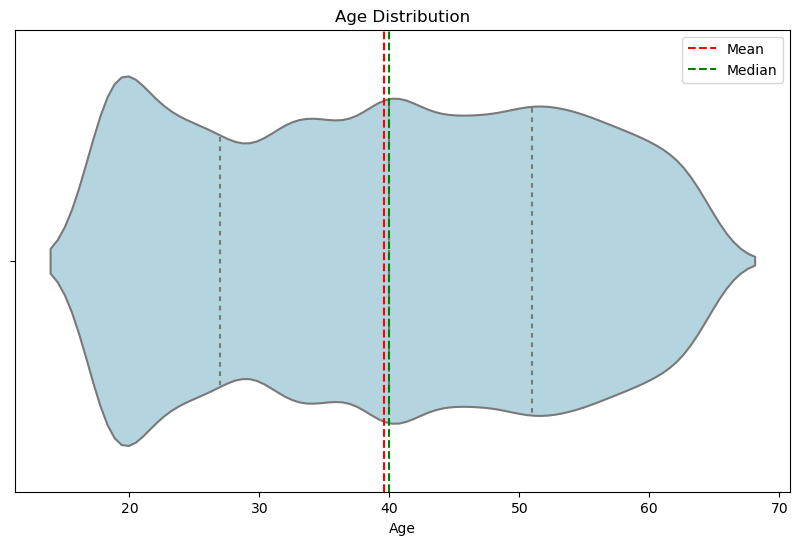

Skewness: 0.006241188212225505
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [17]:

plt.figure(figsize=(10, 6))
sns.violinplot(x='age', data=temp_data, inner='quartile', color='lightblue')
 
# Adding lines to represent the mean and median
plt.axvline(temp_data.age.mean(), color='red', linestyle='--', linewidth=1.5, label='Mean')
plt.axvline(temp_data.age.median(), color='green', linestyle='--', linewidth=1.5, label='Median')
 
# Adding labels and title
plt.title('Age Distribution')
plt.xlabel('Age')
 
# Adding a legend to explain the lines
plt.legend()
 
# Displaying the plot
plt.show()
print(f'Skewness: {temp_data["age"].skew()}')
print(f'Mean: {(temp_data["age"].mean()):.0f}')
print(f'Median: {temp_data["age"].median()}')
print(f'Minimum Age: {temp_data["age"].min()}')
print(f'Maximum Age: {temp_data["age"].max()}')

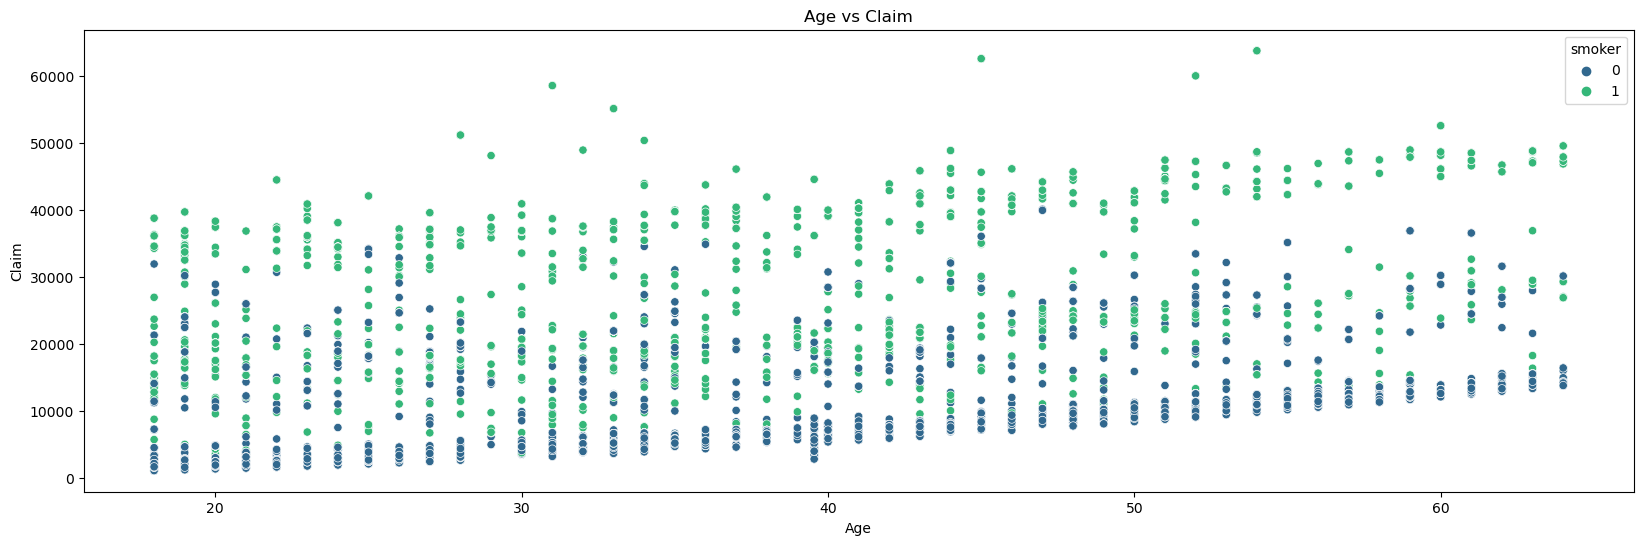

Skewness: 0.006241188212225505
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [18]:
 
# Set the size of the figure
plt.figure(figsize=(20, 6))
 
# Create a color map based on the unique values in the 'smoker' column
color_map = {value: idx for idx, value in enumerate(temp_data['smoker'].unique())}
 
# Create a scatter plot using the Seaborn scatterplot function and the color map for the 'hue' parameter
sns.scatterplot(x='age', y='claim', data=temp_data, hue='smoker', palette='viridis')
 
# Set the title and labels of the plot
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
 
# Display the plot
plt.show()
 
# Print statistical details
print(f'Skewness: {temp_data["age"].skew()}')
print(f'Mean: {(temp_data["age"].mean()):.0f}')
print(f'Median: {temp_data["age"].median()}')
print(f'Minimum Age: {temp_data["age"].min()}')
print(f'Maximum Age: {temp_data["age"].max()}')

In [19]:
# Compute a composite risk score for each individual
# The weights are arbitrary and can be adjusted based on domain knowledge
weights = {
    'age': 0.1,  # older age might be associated with higher risk
    'bmi': 0.1,  # higher BMI might be associated with higher risk
    'smoker': 2,  # smokers might have significantly higher risk
    'diabetes': 1.5,  # diabetes might be associated with higher risk
    'bloodpressure': 1, 
    'claim': 0.75  # past claims might indicate higher risk
}

# Calculate the risk score
temp_data['risk_score'] = (
    temp_data['age'] * weights['age'] +
    temp_data['bmi'] * weights['bmi'] +
    temp_data['smoker'] * weights['smoker'] +
    temp_data['diabetes'] * weights['diabetes'] +
    temp_data['bloodpressure'] * weights['bloodpressure'] +
    temp_data['claim'] * weights['claim']
)

# Display the first few rows with the risk score
temp_data[['age', 'bmi', 'smoker', 'diabetes', 'bloodpressure','claim', 'risk_score']]

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/1640826454.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['risk_score'] = (


,age,bmi,smoker,diabetes,bloodpressure,claim,risk_score
0,60.0,24.3,0,0,72,13112.6,9914.880
1,49.0,22.6,0,1,78,9567.0,7261.910
2,32.0,17.8,1,1,88,32734.2,24647.130
3,61.0,36.4,1,1,72,48517.6,36473.440
4,19.0,20.6,0,1,82,1731.7,1386.235
...,...,...,...,...,...,...,...
14994,38.0,27.3,0,1,0,6555.1,4924.355
14995,39.0,28.3,1,1,54,21082.2,15875.880
14996,39.0,29.6,0,1,64,7512.3,5706.585
14998,52.0,36.7,0,1,70,9144.6,6938.820


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


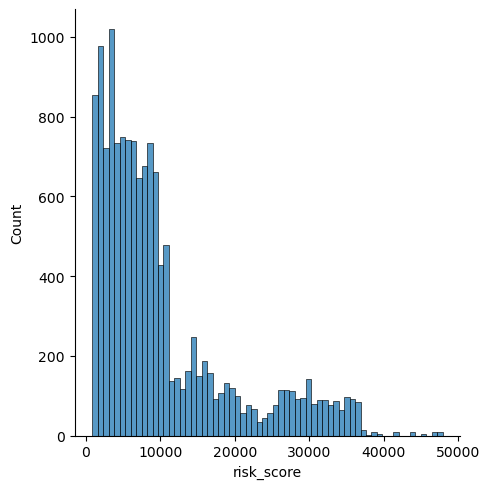

In [20]:
sns.displot(temp_data.risk_score)

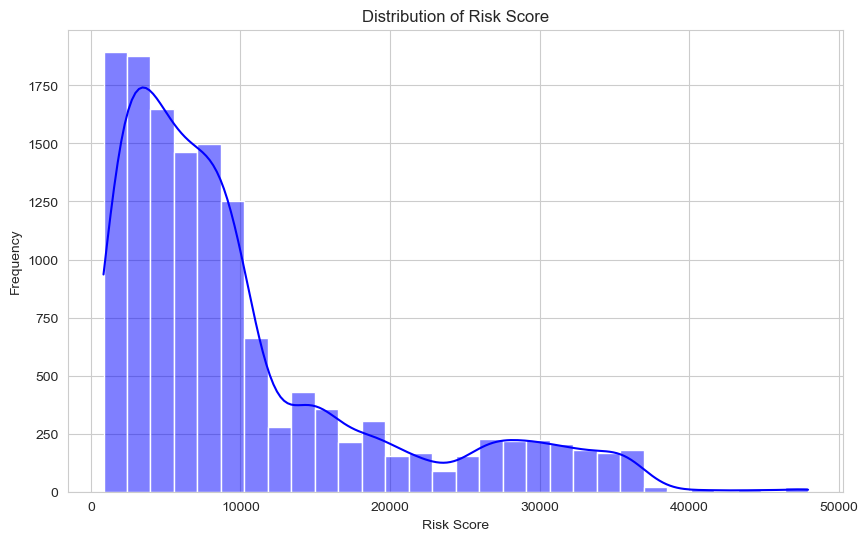

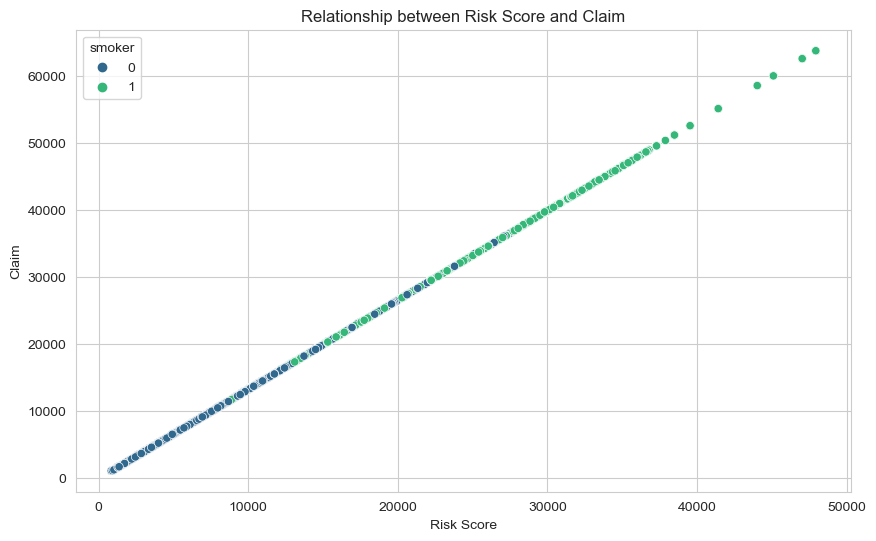

In [21]:
# Setting the style for the plots
sns.set_style('whitegrid')
# Plotting the distribution of the risk score
plt.figure(figsize=(10, 6))
sns.histplot(temp_data['risk_score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()
# Plotting the relationship between risk score and claim
plt.figure(figsize=(10, 6))
sns.scatterplot(x='risk_score', y='claim', data=temp_data, hue='smoker', palette='viridis')
plt.title('Relationship between Risk Score and Claim')
plt.xlabel('Risk Score')
plt.ylabel('Claim')
plt.show()

In [22]:
temp_data['risk_score'].min()

847.0450000000001

In [23]:
temp_data['risk_score']=temp_data['risk_score']/1000

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/1990519888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['risk_score']=temp_data['risk_score']/1000


/Users/sindhukavyaalahari/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


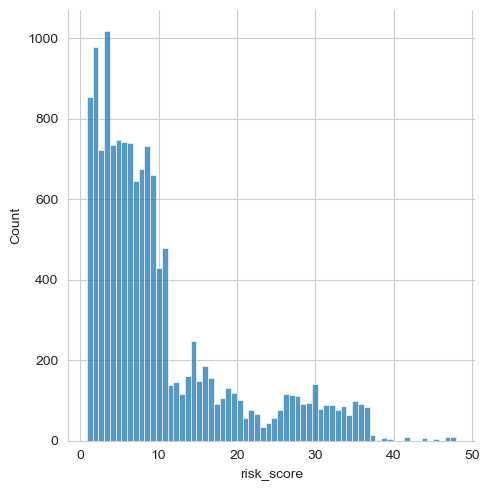

In [24]:
sns.displot(temp_data.risk_score)

In [25]:
tem=temp_data['risk_score'].value_counts()

In [26]:
temp_data['risk_score'].max()

47.93144

In [27]:
def refined_premium_without_region(row):
    base_premium = 300  # Setting a static base premium

 

    # Adjusting the premium based on risk score
    if row['risk_score'] < 10:
        risk_multiplier = 1
    elif row['risk_score'] < 20:
        risk_multiplier = 1.15
    elif row['risk_score'] < 30:
        risk_multiplier = 1.3
    elif row['risk_score'] < 40:
        risk_multiplier = 1.45
    else:
        risk_multiplier = 1.6

 

    # Adjusting the premium based on age
    if row['age'] < 30:
        age_multiplier = 0.9
    elif row['age'] < 50:
        age_multiplier = 1.05
    else:
        age_multiplier = 1.2

 

    # Adjusting the premium for smokers
    smoker_multiplier = 1.5 if row['smoker'] == 1 else 1

 

    # Calculating the final premium
    premium = base_premium * risk_multiplier * age_multiplier * smoker_multiplier
    return premium

 

# Applying the refined function to the dataset to calculate charges
temp_data['refined_charges'] = temp_data.apply(refined_premium_without_region, axis=1)

 

# Displaying the first few rows of the dataset with the new 'refined_charges' column
temp_data.head()

/var/folders/v7/c7_xhzbn47n7kzmqg4jkhntc0000gn/T/ipykernel_88879/1904461938.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_data['refined_charges'] = temp_data.apply(refined_premium_without_region, axis=1)


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,risk_score,refined_charges
0,60.0,1,64,24.3,8,1,0,55,72,0,0,2,13112.6,9.914880,360.00
1,49.0,0,75,22.6,8,1,0,5,78,1,1,16,9567.0,7.261910,315.00
2,32.0,0,64,17.8,4,2,1,63,88,1,1,0,32734.2,24.647130,614.25
3,61.0,0,53,36.4,8,1,1,64,72,1,0,10,48517.6,36.473440,783.00
4,19.0,0,50,20.6,8,0,0,8,82,1,0,22,1731.7,1.386235,270.00


In [28]:
# Handle categorical data
label_encoders = {}

for column in ['sex', 'hereditary_diseases', 'city', 'job_title']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
# Split the data into features and target variable
X = data.drop(columns=['claim'])
y = data['claim']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build and train the models
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

# Print evaluation metrics
print(f"Linear Regression: MSE={mse_lr}, RMSE={rmse_lr}, R2={r2_lr}")
print(f"Decision Tree: MSE={mse_dt}, RMSE={rmse_dt}, R2={r2_dt}")
print(f"Random Forest: MSE={mse_rf}, RMSE={rmse_rf}, R2={r2_rf}")
# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'XGBoost - MSE: {mse}, RMSE: {rmse}, R2: {r2}')


Linear Regression: MSE=38248652.46127296, RMSE=6184.549495417832, R2=0.743899454291729
Decision Tree: MSE=7232083.28994, RMSE=2689.2532959801315, R2=0.9515763207857687
Random Forest: MSE=4725140.262952513, RMSE=2173.7387752332415, R2=0.9683619965143737
XGBoost - MSE: 5479236.234213485, RMSE: 2340.7768441723542, R2: 0.9633128149791057


In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Load the data
data = pd.read_csv('1651277648862_healthinsurance.csv')

# Step 1: Handle null values

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Fill null values in numerical columns with the mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill null values in categorical columns with the mode
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Check for null values to ensure they are handled
print("Null values after filling:")
print(data.isnull().sum())

# Step 2: Handle categorical data
label_encoders = {}
categorical_columns = ['sex', 'hereditary_diseases', 'city', 'job_title']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Get the mapping of encoded values to original city names
encoded_cities = data['city'].unique()
city_names = label_encoders['city'].inverse_transform(encoded_cities)

# Create a mapping of encoded city values to their original names
city_mapping = dict(zip(encoded_cities, city_names))

# Find the top 10 cities with the most data
top_cities = data['city'].value_counts().head(10).index

# Dictionary to store models and evaluation metrics for each city
city_models = {}

for city_code in encoded_cities:
    city_name = city_mapping[city_code]
    print(f"Training models for city: {city_name}")

    # Filter the data for the current city using the encoded city code
    city_data = data[data['city'] == city_code]
    
    if city_data.empty:
        print(f"No data available for city: {city_name}. Skipping...")
        continue

    # Split the data into features and target variable
    X = city_data.drop(columns=['claim'])
    y = city_data['claim']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Initialize models
    lr_model = LinearRegression()
    dt_model = DecisionTreeRegressor(random_state=42)
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
    
    # Train the models
    lr_model.fit(X_train, y_train)
    dt_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_lr = lr_model.predict(X_test)
    y_pred_dt = dt_model.predict(X_test)
    y_pred_rf = rf_model.predict(X_test)
    y_pred_xgb = xgb_model.predict(X_test)
    
    # Evaluate the models
    def evaluate_model(y_true, y_pred):
        mse = mean_squared_error(y_true, y_pred)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        r2 = r2_score(y_true, y_pred)
        return mse, rmse, r2
    
    mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
    mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
    mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
    mse_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
    
    # Store the models and evaluation metrics
    city_models[city_name] = {
        'Linear Regression': {'model': lr_model, 'mse': mse_lr, 'rmse': rmse_lr, 'r2': r2_lr},
        'Decision Tree': {'model': dt_model, 'mse': mse_dt, 'rmse': rmse_dt, 'r2': r2_dt},
        'Random Forest': {'model': rf_model, 'mse': mse_rf, 'rmse': rmse_rf, 'r2': r2_rf},
        'XGBoost': {'model': xgb_model, 'mse': mse_xgb, 'rmse': rmse_xgb, 'r2': r2_xgb}
    }
    
    # Print evaluation metrics for the current city
    print(f"Linear Regression: MSE={mse_lr}, RMSE={rmse_lr}, R2={r2_lr}")
    print(f"Decision Tree: MSE={mse_dt}, RMSE={rmse_dt}, R2={r2_dt}")
    print(f"Random Forest: MSE={mse_rf}, RMSE={rmse_rf}, R2={r2_rf}")
    print(f"XGBoost: MSE={mse_xgb}, RMSE={rmse_xgb}, R2={r2_xgb}")
    print("-" * 50)

# Initialize a list to store the summary for each city
city_summary = []

# Iterate over the city_models dictionary to gather metrics
for city_name, models in city_models.items():
    for model_name, metrics in models.items():
        mse = metrics['mse']
        rmse = metrics['rmse']
        r2 = metrics['r2']
        city_summary.append({
            'City': city_name,
            'Model': model_name,
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2
        })

# Create a DataFrame from the summary list
summary_df = pd.DataFrame(city_summary)

# Display the summary DataFrame for the top 10 cities
print("Model Evaluation Summary for Top 10 Cities:")
print(summary_df[summary_df['City'].isin([city_mapping[c] for c in top_cities])])

# Determine the best model for each of the top 10 cities based on RMSE
best_models_top10 = summary_df.loc[summary_df[summary_df['City'].isin([city_mapping[c] for c in top_cities])].groupby('City')['RMSE'].idxmin()]

print("\nBest Model for Each of the Top 10 Cities Based on RMSE:")
print(best_models_top10)

# Calculate the average RMSE for each model across all cities
avg_rmse = summary_df.groupby('Model')['RMSE'].mean().sort_values()

print("\nAverage RMSE for Each Model Across All Cities:")
print(avg_rmse)

# Find the model with the lowest average RMSE
best_overall_model = avg_rmse.idxmin()

print(f"\nThe best overall model based on average RMSE across all cities is: {best_overall_model}")


Null values after filling:
age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
dtype: int64
Training models for city: NewYork
Linear Regression: MSE=53380148.83997517, RMSE=7306.171968957148, R2=0.6571206633365559
Decision Tree: MSE=72018786.2021875, RMSE=8486.388289619294, R2=0.5373981868364545
Random Forest: MSE=66643889.38276304, RMSE=8163.570872036516, R2=0.5719230260534365
XGBoost: MSE=68394745.84439822, RMSE=8270.111598061916, R2=0.5606766635909025
--------------------------------------------------
Training models for city: Boston
Linear Regression: MSE=39940026.21276671, RMSE=6319.812197586785, R2=0.6942819311806303
Decision Tree: MSE=46440553.919062495, RMSE=6814.73065638419, R2=0.6445241076356796
Random Fores

Linear Regression: MSE=33491790.983450714, RMSE=5787.209256926063, R2=0.7597814654402568
Decision Tree: MSE=67239086.33946429, RMSE=8199.944288802473, R2=0.5177303359625236
Random Forest: MSE=30369823.996024363, RMSE=5510.882324639528, R2=0.7821736490960676
XGBoost: MSE=27542425.697541025, RMSE=5248.08781343653, R2=0.8024530505832556
--------------------------------------------------
Training models for city: Atlanta
Linear Regression: MSE=26561058.15057791, RMSE=5153.742150183487, R2=0.6846374232373861
Decision Tree: MSE=56120058.39000001, RMSE=7491.332217302875, R2=0.3336799263942849
Random Forest: MSE=23325188.244168736, RMSE=4829.615744981037, R2=0.7230572883635649
XGBoost: MSE=28807453.901979428, RMSE=5367.257577383391, R2=0.6579657014793747
--------------------------------------------------
Training models for city: Brimingham
Linear Regression: MSE=35303547.914417975, RMSE=5941.678880116122, R2=0.8160865588248012
Decision Tree: MSE=44270446.52549999, RMSE=6653.604025300874, R2=0

Linear Regression: MSE=42136425.861719586, RMSE=6491.257648693324, R2=0.7823105727554918
Decision Tree: MSE=46847505.1604, RMSE=6844.523735103853, R2=0.7579717226214348
Random Forest: MSE=33721401.74996406, RMSE=5807.013152212078, R2=0.825785113884074
XGBoost: MSE=35093196.45429999, RMSE=5923.951084732215, R2=0.8186980105672446
--------------------------------------------------
Training models for city: Mandan
Linear Regression: MSE=87158516.39639212, RMSE=9335.872556777547, R2=0.6636239450751507
Decision Tree: MSE=76640716.1272, RMSE=8754.468352058851, R2=0.7042159182673975
Random Forest: MSE=68476053.91550155, RMSE=8275.02591630392, R2=0.7357262855627134
XGBoost: MSE=69853483.09183842, RMSE=8357.839618695636, R2=0.730410291080116
--------------------------------------------------
Training models for city: Waterloo
Linear Regression: MSE=45709413.074507885, RMSE=6760.873691654643, R2=0.7734801395385731
Decision Tree: MSE=39525393.0872, RMSE=6286.922385969147, R2=0.8041259792112965
Ran

Linear Regression: MSE=24686573.112442464, RMSE=4968.558454163789, R2=0.6162112556199859
Decision Tree: MSE=49621814.76777778, RMSE=7044.275318851313, R2=0.2285565964607531
Random Forest: MSE=19652208.169295106, RMSE=4433.081114675786, R2=0.6944777931211936
XGBoost: MSE=25329337.909200337, RMSE=5032.826036055721, R2=0.6062185404239248
--------------------------------------------------
Training models for city: Minneapolis
Linear Regression: MSE=5354781.26857995, RMSE=2314.040031758299, R2=0.8055359582078266
Decision Tree: MSE=34409349.01761905, RMSE=5865.948262439676, R2=-0.24960866742896082
Random Forest: MSE=15020832.365648529, RMSE=3875.671859903587, R2=0.4545039981285104
XGBoost: MSE=50032727.76862607, RMSE=7073.381636008768, R2=-0.8169867219160467
--------------------------------------------------
Training models for city: JeffersonCity
Linear Regression: MSE=26346820.572915275, RMSE=5132.91540675621, R2=-0.3381614445899108
Decision Tree: MSE=11766204.773809526, RMSE=3430.19019499

Linear Regression: MSE=44343752.43121795, RMSE=6659.110483481855, R2=0.7362734811805172
Decision Tree: MSE=53164506.33150001, RMSE=7291.399476883708, R2=0.6838136285080791
Random Forest: MSE=32941097.052413125, RMSE=5739.433513197372, R2=0.8040887300820376
XGBoost: MSE=44062566.18620373, RMSE=6637.964009107291, R2=0.7379457859691692
--------------------------------------------------
Training models for city: Kingman
Linear Regression: MSE=32133633.483257066, RMSE=5668.6535864574635, R2=0.8295740920096276
Decision Tree: MSE=54058702.812750004, RMSE=7352.462363912515, R2=0.7132909505411217
Random Forest: MSE=26034722.791267604, RMSE=5102.423227376145, R2=0.8619206485537567
XGBoost: MSE=31270988.692163177, RMSE=5592.046914338539, R2=0.8341492677945865
--------------------------------------------------
Training models for city: Bakersfield
Linear Regression: MSE=36777898.0623489, RMSE=6064.47838336892, R2=0.34535238770757437
Decision Tree: MSE=63670576.055142865, RMSE=7979.38444086653, R2=